##**TIME SERIES FORECASTING: COMPARING SARIMA AND PROPHET MODEL**

-> This model is used to predict/forecast values based on past data that is orered over time.

here  have used a supermarkets order data and previous sales to predict its future sales using:

1.   SARIMA model
2.   prophet library

& compared the results of both the models.

this was very fun to learn and has real life applications such as predicting monthly sales, predicting growth of a youtube or instagram page by predicting follower/subscriber count, stock prices, website traffic flow, this can also help stores and fast consumption goods based on seasonality trends.




In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
import kagglehub
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

Using Colab cache for faster access to the 'sales-forecasting' dataset.


In [ ]:
df = pd.read_csv(f"{path}/train.csv")

In [ ]:
print(df.shape)
df.tail()

(9800, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [ ]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')
#converts column orderdate to date time format instead of obj(string)

In [ ]:
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum()
#grps each month data and calcs total sale for that month only

print(monthly_sales.head())

Order Date
2015-01-31    14205.707
2015-02-28     4519.892
2015-03-31    55205.797
2015-04-30    27906.855
2015-05-31    23644.303
Freq: ME, Name: Sales, dtype: float64


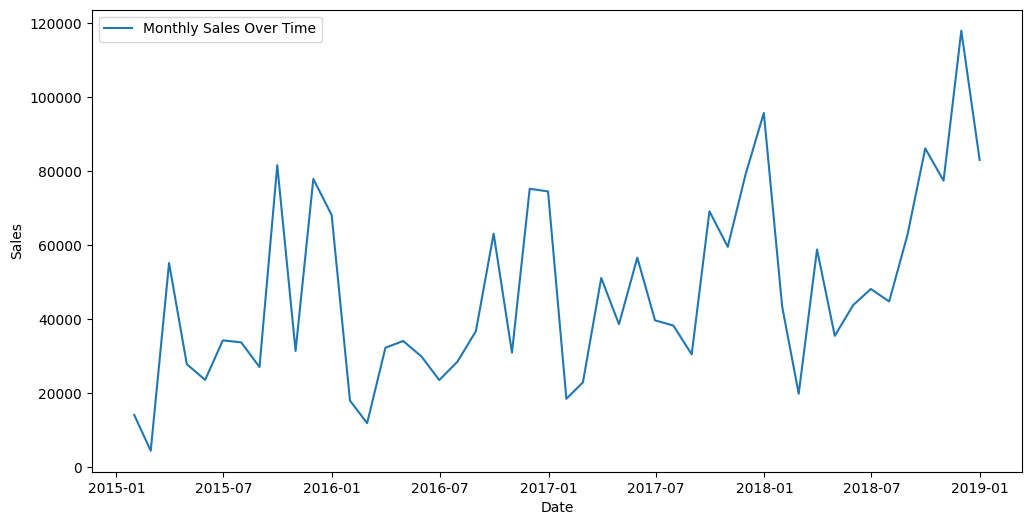

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot (monthly_sales, label="Monthly Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

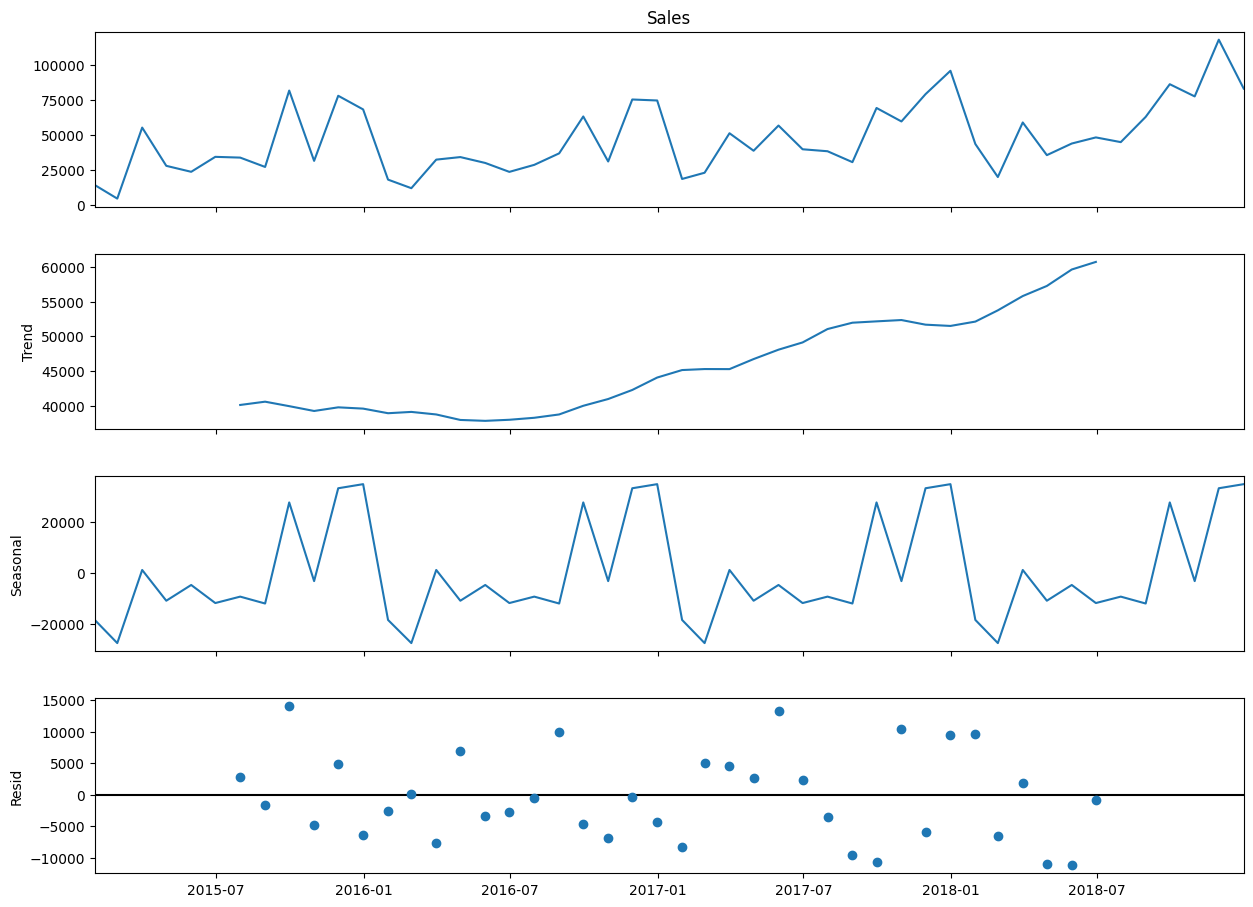

In [ ]:
decomposition = seasonal_decompose(monthly_sales, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

In [ ]:
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('Augmented Dickey-Fuller Test Results:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    return result[1] < 0.05

is_stationary = check_stationarity(monthly_sales)
print(f"Time series is {'stationary' if is_stationary else 'non-stationary'}")

Augmented Dickey-Fuller Test Results:
ADF Statistic: -4.416136761430769
p-value: 0.00027791039276670623
Critical values:
	1%: -3.5778480370438146
	5%: -2.925338105429433
	10%: -2.6007735310095064
Time series is stationary


In [ ]:

auto_model = auto_arima(monthly_sales,
start_p=0, start_q=0,
max_p=5, max_q=5,
m=12,
seasonal=True,
d=None,
trace=True,
error_action= 'ignore',
suppress_warnings=True,
stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1085.632, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1096.560, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1076.500, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1077.487, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1094.708, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1089.579, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.250, Time=0.49 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1078.452, Time=0.22 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1080.901, Time=0.42 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1079.864, Time=0.91 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.035, Time=0.19 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.635, Time=0.53 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.151, Time=0.14 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.267, Time=0.63 sec
 ARIMA(2,1,0)(1,0,1

In [ ]:
model = ARIMA(monthly_sales,
              order = auto_model.order,
              seasonal_order = auto_model.seasonal_order)
results = model.fit()

In [ ]:
forecast_periods = 12
forecast = results.get_forecast(steps=forecast_periods)
mean_forecast = forecast.predicted_mean

In [ ]:
conf_int_95 = forecast.conf_int(alpha=0.05)
conf_int_80 = forecast.conf_int(alpha=0.2)
conf_int_70 = forecast.conf_int(alpha=0.3)

# **(S)ARIMA MODEL**


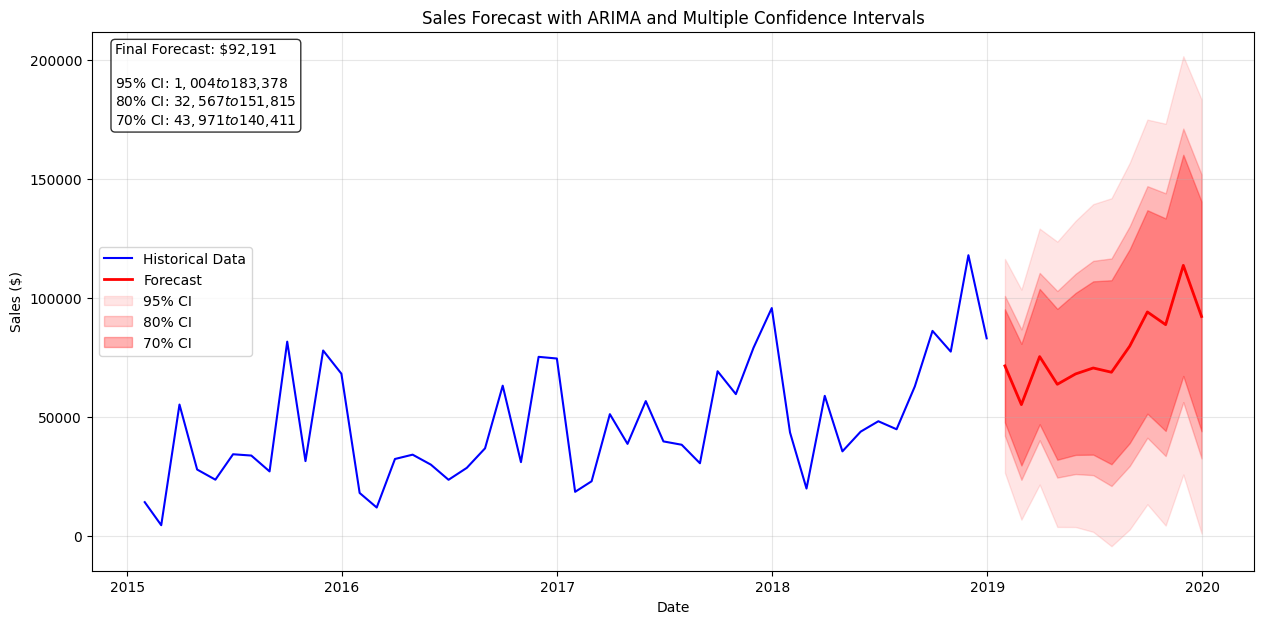

In [ ]:
plt.figure(figsize=(15, 7))

# Plot historical data and forecast
plt.plot(monthly_sales, label='Historical Data', color='blue')
plt.plot(mean_forecast, label='Forecast', color='red', linewidth=2)

# Plot confidence intervals
plt.fill_between(mean_forecast.index,
                 conf_int_95.iloc[:, 0],
                 conf_int_95.iloc[:, 1],
                 color='red', alpha=0.1,
                 label='95% CI')

plt.fill_between(mean_forecast.index,
                 conf_int_80.iloc[:, 0],
                 conf_int_80.iloc[:, 1],
                 color='red', alpha=0.2,
                 label='80% CI')

plt.fill_between(mean_forecast.index,
                 conf_int_70.iloc[:, 0],
                 conf_int_70.iloc[:, 1],
                 color='red', alpha=0.3,
                 label='70% CI')

plt.title('Sales Forecast with ARIMA and Multiple Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)


last_forecast = mean_forecast.iloc[-1]

ranges_95_lower = conf_int_95.iloc[-1, 0]
ranges_95_upper = conf_int_95.iloc[-1, 1]

ranges_80_lower = conf_int_80.iloc[-1, 0]
ranges_80_upper = conf_int_80.iloc[-1, 1]

ranges_70_lower = conf_int_70.iloc[-1, 0]
ranges_70_upper = conf_int_70.iloc[-1, 1]


# Create info text box

info_text = (
    f'Final Forecast: ${last_forecast:,.0f}\n\n'
    f'95% CI: ${ranges_95_lower:,.0f} to ${ranges_95_upper:,.0f}\n'
    f'80% CI: ${ranges_80_lower:,.0f} to ${ranges_80_upper:,.0f}\n'
    f'70% CI: ${ranges_70_lower:,.0f} to ${ranges_70_upper:,.0f}'
)

plt.text(0.02, 0.98, info_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

In [ ]:
# Calculate and display metrics
print("\nModel Performance Metrics:")

mse = mean_squared_error(monthly_sales, results.fittedvalues)
rmse = np.sqrt(mse)
mae = mean_absolute_error(monthly_sales, results.fittedvalues)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Print forecast information
print("\nForecast Ranges for Final Period:")
print(f"Point Forecast: ${last_forecast:,.2f}")

print("\nConfidence Intervals:")
print(f"95% CI: ${ranges_95_lower:,.2f} to ${ranges_95_upper:,.2f}")
print(f"80% CI: ${ranges_80_lower:,.2f} to ${ranges_80_upper:,.2f}")
print(f"70% CI: ${ranges_70_lower:,.2f} to ${ranges_70_upper:,.2f}")

# Calculate and print interval widths
print("\nInterval Widths as Percentage of Forecast:")

print(f"95% CI: ±{((ranges_95_upper - ranges_95_lower) / 2 / last_forecast * 100):.1f}%")
print(f"80% CI: ±{((ranges_80_upper - ranges_80_lower) / 2 / last_forecast * 100):.1f}%")
print(f"70% CI: ±{((ranges_70_upper - ranges_70_lower) / 2 / last_forecast * 100):.1f}%")

# Create forecast dataframe
forecast_df = pd.DataFrame({
    'Forecast': mean_forecast,
    '95% Lower': conf_int_95.iloc[:, 0],
    '95% Upper': conf_int_95.iloc[:, 1],
    '80% Lower': conf_int_80.iloc[:, 0],
    '80% Upper': conf_int_80.iloc[:, 1],
    '70% Lower': conf_int_70.iloc[:, 0],
    '70% Upper': conf_int_70.iloc[:, 1]
})

print("\nDetailed Forecast with Confidence Intervals:")
print(forecast_df)


Model Performance Metrics:
Mean Squared Error (MSE): 372198461.41
Root Mean Squared Error (RMSE): 19292.45
Mean Absolute Error (MAE): 14432.38

Forecast Ranges for Final Period:
Point Forecast: $92,191.07

Confidence Intervals:
95% CI: $1,003.72 to $183,378.42
80% CI: $32,566.87 to $151,815.28
70% CI: $43,970.99 to $140,411.15

Interval Widths as Percentage of Forecast:
95% CI: ±98.9%
80% CI: ±64.7%
70% CI: ±52.3%

Detailed Forecast with Confidence Intervals:
                 Forecast     95% Lower      95% Upper     80% Lower  \
2019-01-31   71457.294751  26519.448466  116395.141036  42074.016429   
2019-02-28   55170.675698   6856.399051  103484.952345  23579.668229   
2019-03-31   75354.273330  21594.176485  129114.370174  40202.435430   
2019-04-30   63712.967935   3787.033048  123638.902823  24529.505241   
2019-05-31   68065.122556   3753.333485  132376.911627  26013.903953   
2019-06-30   70562.386142   1722.863584  139401.908699  25550.641742   
2019-07-31   68781.958294  -430

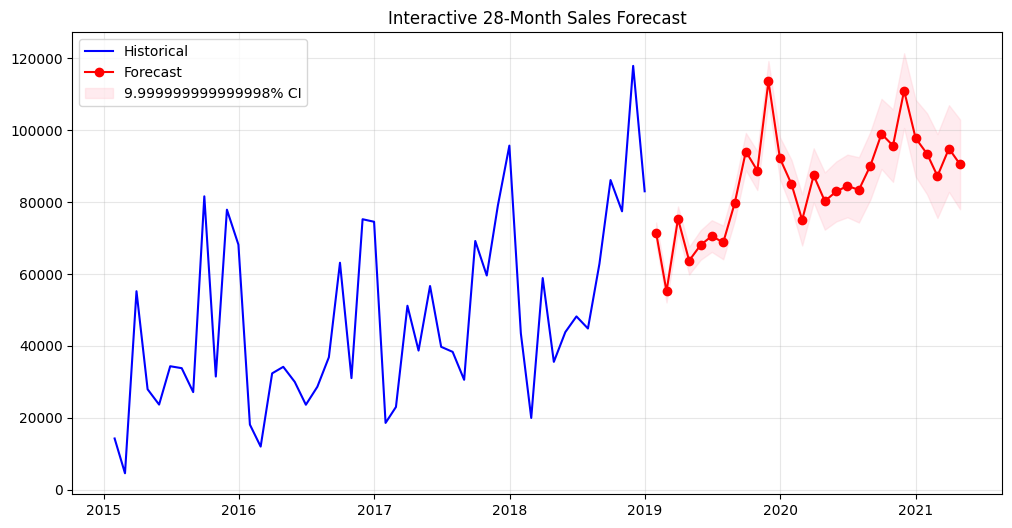

,Forecast,Lower Bound,Upper Bound
2019-01-31,71457.294751,68576.144723,74338.444779
2019-02-28,55170.675698,52073.048842,58268.302555
2019-03-31,75354.273330,71907.492557,78801.054102
2019-04-30,63712.967935,59870.869943,67555.065927
2019-05-31,68065.122556,63941.829425,72188.415686
2019-06-30,70562.386142,66148.801408,74975.970876
2019-07-31,68781.958294,64095.858349,73468.058239
2019-08-31,79738.550996,74800.847576,84676.254416
2019-09-30,94101.274958,88920.813052,99281.736865
2019-10-31,88767.503543,83355.840179,94179.166908


In [ ]:
#@title Interactive Sales Forecast { run: "auto" }
forecast_periods = 28 #@param {type:"slider", min:1, max:36, step:1}
confidence_alpha = 0.90 #@param {type:"number"}

# Generate Forecast
forecast_obj = results.get_forecast(steps=forecast_periods)
mean_f = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int(alpha=confidence_alpha)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical', color='blue')
plt.plot(mean_f, label='Forecast', color='red', marker='o')
plt.fill_between(mean_f.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label=f'{(1-confidence_alpha)*100}% CI')
plt.title(f'Interactive {forecast_periods}-Month Sales Forecast')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

display(pd.DataFrame({
    'Forecast': mean_f,
    'Lower Bound': conf_int.iloc[:, 0],
    'Upper Bound': conf_int.iloc[:, 1]
}))

# **PROPHET MODEL**

In [ ]:
!pip install prophet
from prophet import Prophet

In [ ]:
df = pd.read_csv(f"{path}/train.csv")

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')

In [ ]:
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum()


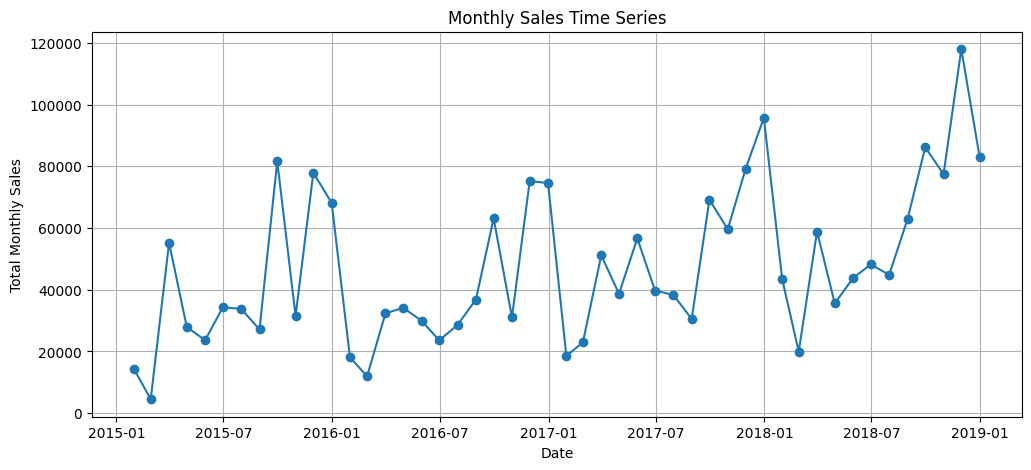

In [ ]:
plt.figure(figsize=(12,5))


plt.plot(monthly_sales.index, monthly_sales.values, marker='o')

plt.title("Monthly Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Total Monthly Sales")

plt.grid(True)
plt.show()

In [ ]:
m = Prophet()

# Convert monthly_sales Series to a DataFrame and rename columns for Prophet
prophet_df = monthly_sales.reset_index()
prophet_df.columns = ['ds', 'y']

# Display the first few rows to confirm
print(prophet_df.head())

# Fit the model
m.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          y
0 2015-01-31  14205.707
1 2015-02-28   4519.892
2 2015-03-31  55205.797
3 2015-04-30  27906.855
4 2015-05-31  23644.303


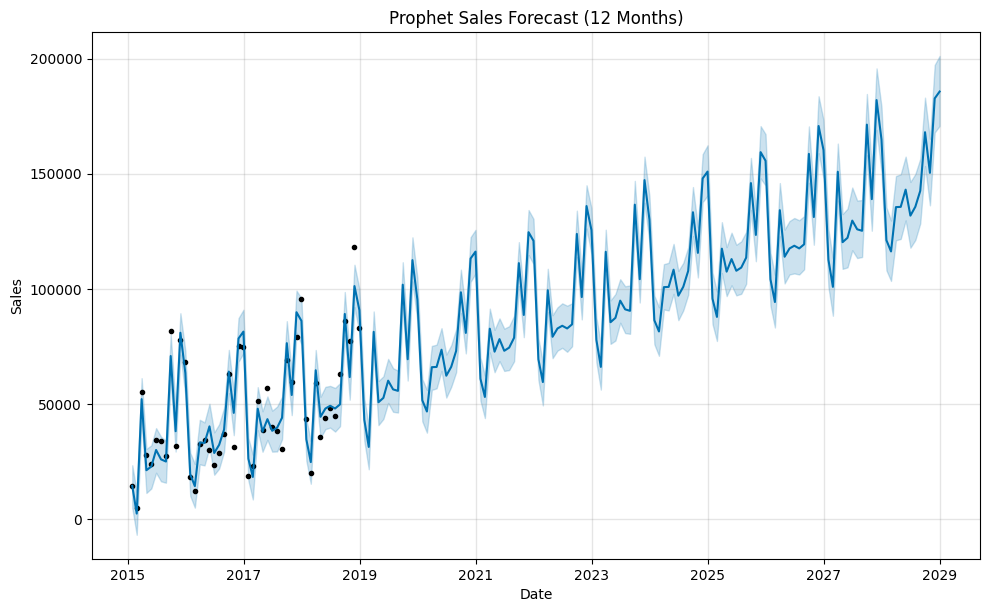

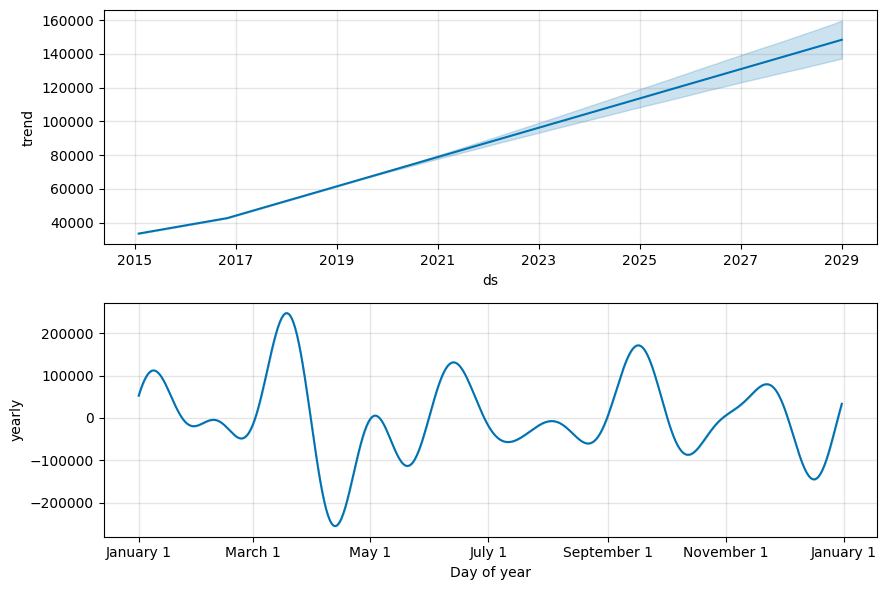

In [ ]:
# Create future dates for 12 months
future = m.make_future_dataframe(periods=120, freq='ME')

# Make predictions
forecast = m.predict(future)

# Plot the forecast
fig1 = m.plot(forecast)
plt.title('Prophet Sales Forecast (12 Months)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Plot the components (trend, yearly seasonality)
fig2 = m.plot_components(forecast)
plt.show()

# **COMPARISION BTWN SARIMA AND PROPHET**

In [ ]:
# Split data into train and test (last 12 months for testing)
train_data = monthly_sales[:-12]
test_data = monthly_sales[-12:]

# 1. SARIMA Model Evaluation
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train_data, order=auto_model.order, seasonal_order=auto_model.seasonal_order)
sarima_fit = sarima_model.fit(disp=False)
sarima_pred = sarima_fit.forecast(steps=12)

# 2. Prophet Model Evaluation
prophet_train = train_data.reset_index()
prophet_train.columns = ['ds', 'y']
m_comp = Prophet(yearly_seasonality=True)
m_comp.fit(prophet_train)
future_comp = m_comp.make_future_dataframe(periods=12, freq='ME')
prophet_forecast = m_comp.predict(future_comp)
prophet_pred = prophet_forecast.iloc[-12:]['yhat'].values

# Calculate Metrics
def get_metrics(true, pred):
    mse = mean_squared_error(true, pred)
    return np.sqrt(mse), mean_absolute_error(true, pred)

sarima_rmse, sarima_mae = get_metrics(test_data, sarima_pred)
prophet_rmse, prophet_mae = get_metrics(test_data, prophet_pred)

comparison_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE'],
    'SARIMA': [sarima_rmse, sarima_mae],
    'Prophet': [prophet_rmse, prophet_mae]
})

display(comparison_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Metric,SARIMA,Prophet
0,RMSE,22662.946790,14133.075195
1,MAE,18861.515875,9839.837157


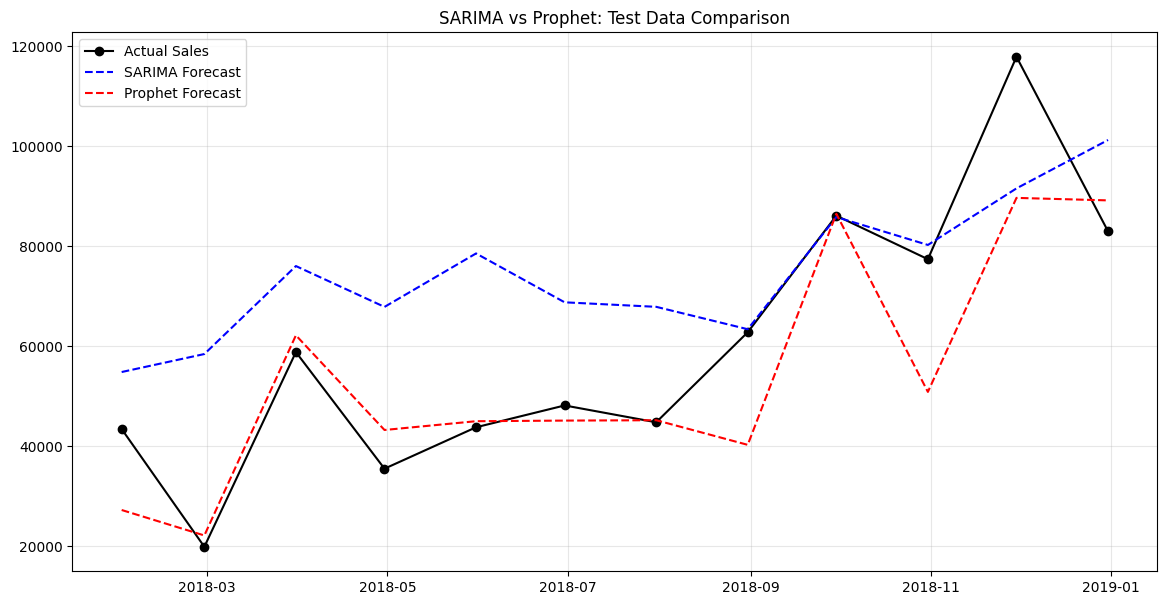

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data.values, label='Actual Sales', color='black', marker='o')
plt.plot(test_data.index, sarima_pred, label='SARIMA Forecast', linestyle='--', color='blue')
plt.plot(test_data.index, prophet_pred, label='Prophet Forecast', linestyle='--', color='red')

plt.title('SARIMA vs Prophet: Test Data Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()